<a href="https://colab.research.google.com/github/HardikCoder45/Anilmultiservice2/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1>Welcome to Colab!</h1>
</div>

<div class="markdown-google-sans">
  <h2>Explore the Gemini API</h2>
  <p>The Gemini API gives you access to Gemini models created by Google DeepMind. Gemini models are built from the ground up to be multimodal, so you can reason seamlessly across text, images, code, and audio.
  </p>
  <strong>How to get started</strong>
    <ol>
      <li>Go to <a href="https://aistudio.google.com/">Google AI Studio</a> and log in with your Google account.</li>
      <li><a href="https://aistudio.google.com/app/apikey">Create an API key</a>.</li>
      <li>Use a quickstart for <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Prompting.ipynb">Python</a>, or call the REST API using <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/rest/Prompting_REST.ipynb">curl</a>.</li>
      </ol>
  <strong>Explore use cases</strong>
    <ul>
      <li><a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Market_a_Jet_Backpack.ipynb">Create a marketing campaign</a></li>
      <li><a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Audio.ipynb">Analyze audio recordings</a></li>
      <li><a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/System_instructions.ipynb">Use System instructions in chat</a></li>
    </ul>
  <p>To learn more, check out the <a href="https://github.com/google-gemini/cookbook">Gemini cookbook</a> or visit the <a href="https://ai.google.dev/docs/">Gemini API documentation</a>.
  </p>
</div>


<msg desc="Text shown above a link to https://www.youtube.com/watch?v=V7RXyqFUR98 which highlights some helpful features in Colab">Colab now has AI features powered by <a href="https://gemini.google.com">Gemini</a>. The video below provides information on how to use these features, whether you're new to Python, or a seasoned veteran.</msg>

<center>
  <a href="https://www.youtube.com/watch?v=V7RXyqFUR98" target="_blank">
  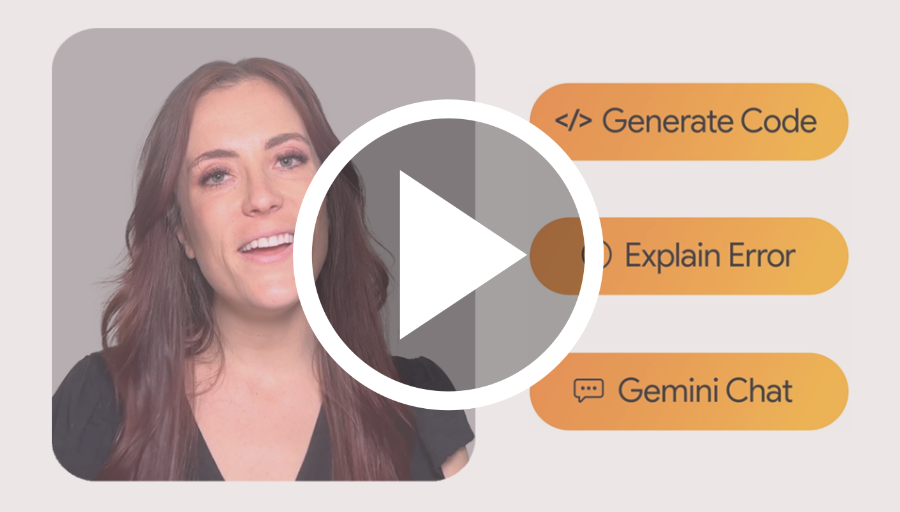
  </a>
</center>

In [2]:
from sklearn.datasets import fetch_openml
mnist =  fetch_openml('mnist_784',as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
X,y = mnist.data,mnist.target

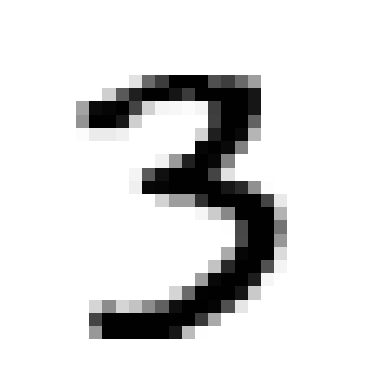

In [4]:
import matplotlib.pyplot as plt
def plot_digit(image_data):
  image = image_data.reshape(28,28)
  plt.imshow(image,cmap='binary')
  plt.axis('off')
  plt.show()
plot_digit(X[10000])


In [5]:
X_test,X_train,Y_test,Y_train = X[60000:],X[:60000],y[60000:],y[:60000]

In [6]:
y_train_5 = (Y_train == '5')
y_test_5 = (Y_test == '5')

In [7]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

sgd_clf.predict([X[10000]])

array([False])

In [8]:
from sklearn.model_selection import cross_val_score
accuray = cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring='accuracy')
accuray

array([0.95035, 0.96035, 0.9604 ])

In [9]:
from sklearn.model_selection import cross_val_predict

y_preds = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3 )

In [10]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_train_5,y_preds)
conf_mat

array([[53892,   687],
       [ 1891,  3530]])

In [11]:
import numpy as np
def precision_recall(confusion_matrix):
  tp = confusion_matrix [1][1]
  fp = confusion_matrix [0][1]
  fn = confusion_matrix [1][0]
  prec = tp/(tp+fp)
  rec = tp/(tp+fn)
  f1 = 2*prec*rec/(prec+rec)
  return np.array([prec,rec,f1])




In [12]:
output = precision_recall(conf_mat)
precision = output[0]
recall = output[1]
f1_score = output[2]
print(precision,recall,f1_score)

0.8370879772350012 0.6511713705958311 0.7325171197343846


In [13]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method='decision_function')
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [14]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds = precision_recall_curve(y_train_5,y_scores)
print(thresholds)

[-146348.56726174 -142300.00705404 -137588.97581744 ...   38871.26391927
   42216.05562787   49441.43765905]


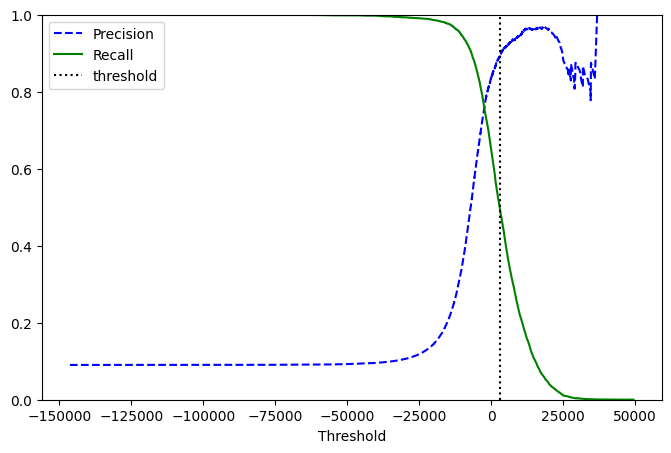

In [15]:
# prompt: plot a graph for this precision, recall, and thereshold  curve graph

plt.figure(figsize=(8, 5))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.vlines(3000,0,1.0, "k","dotted",label = "threshold")
plt.xlabel("Threshold")
plt.legend(loc="upper left")
plt.ylim([0, 1])
plt.show()


In [16]:
score = sgd_clf.decision_function([X[10000]])
pred = sgd_clf.predict([X[10000]])
print(pred)
threshold = 3000
k = (score > threshold)

print(score)
print(k)

[False]
[-4364.44900439]
[False]


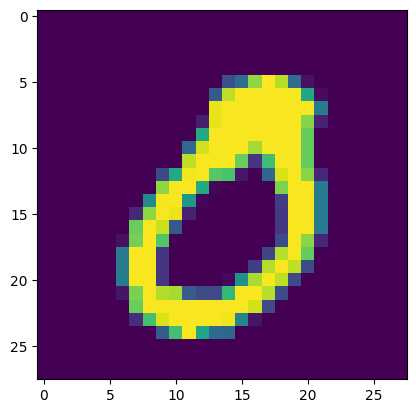

In [17]:

plt.imshow(X[75].reshape(28,28))
plt.show()


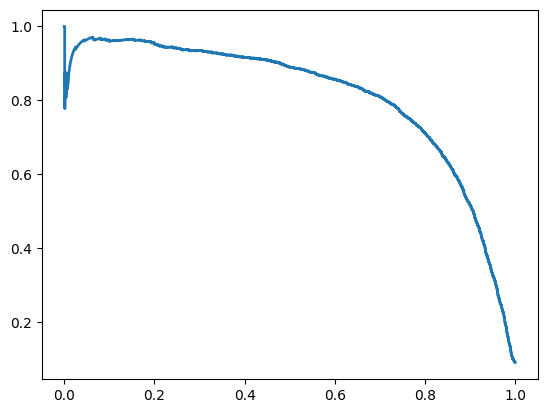

In [18]:
plt.plot(recalls,precisions,linewidth=2, label="precison_vs_recall")
plt.show()

In [19]:
prec_90 =(precisions >= 0.90).argmax()
prec_90_threshold = thresholds[prec_90]
print(prec_90_threshold)

3370.0194991439557


In [20]:
y_score = sgd_clf.decision_function(X_test)
y_train_pred_90 = ( y_score >= prec_90_threshold)
print(y_train_pred_90[:100])
print(y_score[:100])

[False False False False False False False False False False False False
 False False False False False False False False False False False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]
[ -8542.1753957   -4410.49112461  -3416.59592944  -4502.25390906
 -11432.25299769  -5277.25849556  -2501.38632654   -165.38100362
  -3346.22286827 -11618.37601464  -3714.3241421  -19773.71930697
  -5035.14077419  -5747.6155467   -4511.10196769   2609.52400822
 -11757.53926261 -12342.74465869  -6033.97286392  -3188.33428603
  -5372.18075307  -2467.13627186 -13509.12504823   6474.0664993
 

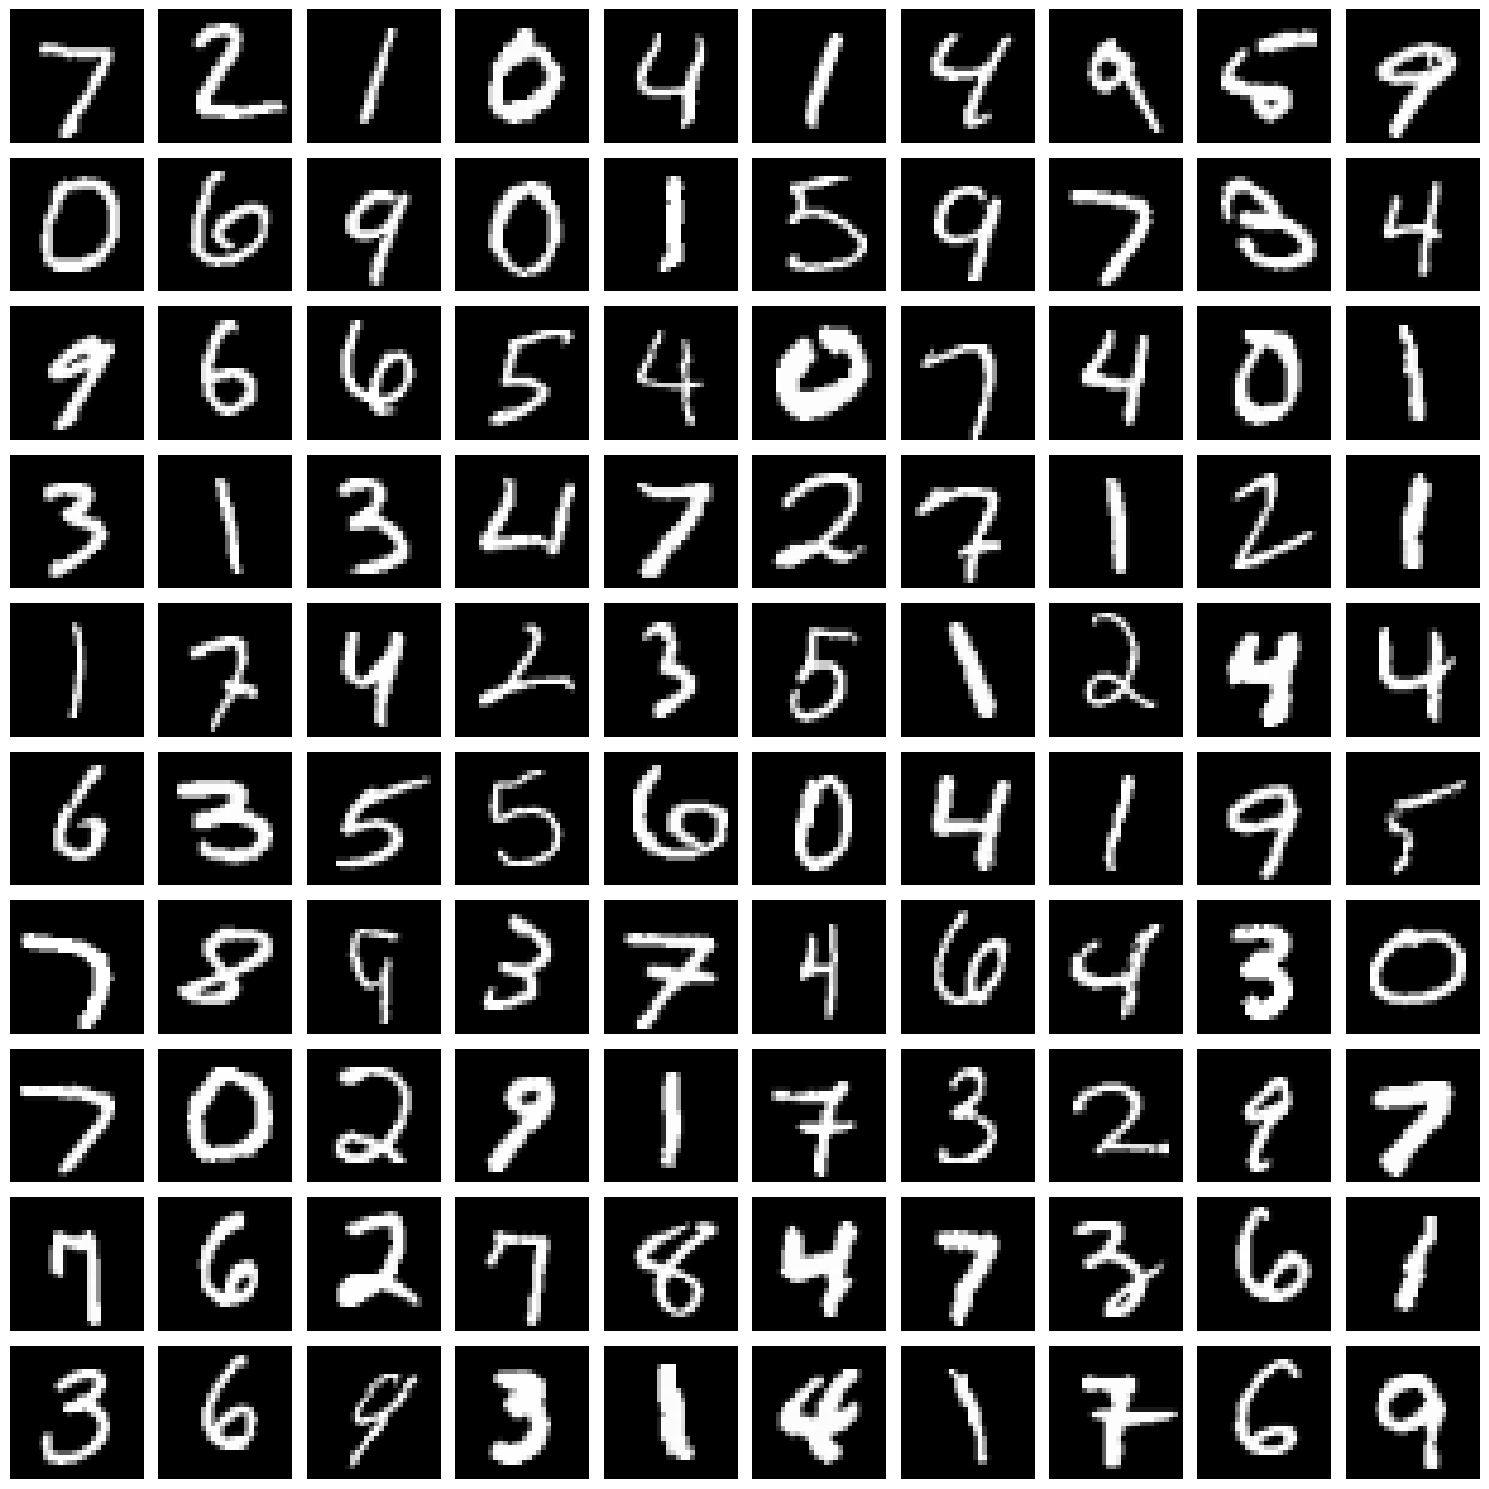

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Example data: creating 100 random images of size 10x10
images = X_test[:100]

# Number of rows and columns for the grid
rows = 10
cols = 10

fig, axes = plt.subplots(rows, cols, figsize=(15, 15))

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i].reshape(28,28), cmap='gray')
    ax.axis('off')  # Hide the axis

plt.tight_layout()
plt.show()


In [22]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

0.9604938554008616

In [23]:
from sklearn.metrics import roc_curve

tpr,fpr,thresh = roc_curve(y_train_5,y_scores)
print(tpr,fpr,thresh)

[0.         0.         0.         ... 0.99937705 0.99937705 1.        ] [0.00000000e+00 1.84467810e-04 9.22339052e-04 ... 9.99815532e-01
 1.00000000e+00 1.00000000e+00] [  49442.43765905   49441.43765905   36801.60697028 ... -105763.22240074
 -106527.45300471 -146348.56726174]


In [24]:
J = tpr - fpr
optimal_idx_roc = np.argmax(J)
optimal_threshold_roc = thresh[optimal_idx_roc]
print(optimal_threshold_roc)

49442.437659047755


In [25]:
y_score = sgd_clf.decision_function(X_test)
y_train_pred_90 = ( y_score >= optimal_threshold_roc)
print(y_train_pred_90[:100])
print(y_score[:100])

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]
[ -8542.1753957   -4410.49112461  -3416.59592944  -4502.25390906
 -11432.25299769  -5277.25849556  -2501.38632654   -165.38100362
  -3346.22286827 -11618.37601464  -3714.3241421  -19773.71930697
  -5035.14077419  -5747.6155467   -4511.10196769   2609.52400822
 -11757.53926261 -12342.74465869  -6033.97286392  -3188.33428603
  -5372.18075307  -2467.13627186 -13509.12504823   6474.0664993
 

In [26]:
y_train_pred_90 = (y_score >= 49442 )
precision_recall(confusion_matrix(y_test_5,y_train_pred_90))

<ipython-input-11-1bc03c67dbaa>:6: RuntimeWarning: invalid value encountered in scalar divide
  prec = tp/(tp+fp)


array([nan,  0., nan])

In [31]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf,X_train,y_train_5,cv=3,method='predict_proba')
y_predict = cross_val_predict(forest_clf,X_train,y_train_5,cv=3)
y_probas_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

In [32]:
prec_forest,recall_forest,threshold_forest = precision_recall_curve(y_train_5,y_probas_forest[:,1])

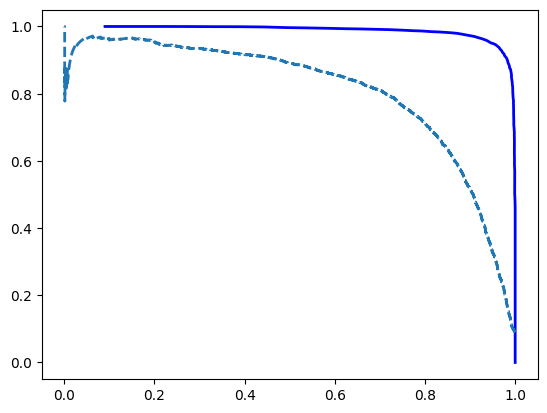

In [33]:
plt.plot(prec_forest,recall_forest,"b-",linewidth=2, label="random forest")
plt.plot(recalls,precisions,"--",linewidth=2, label="sgd classifer" )
plt.show()

In [34]:
prec_rec_forest = precision_recall(confusion_matrix(y_train_5,y_predict))
prec_rec_forest

array([0.99050833, 0.86626084, 0.92422751])

In [35]:
rocauccurveforest = roc_auc_score(y_train_5,y_probas_forest[:,1])
print(rocauccurveforest)

0.9983436731328145


In [41]:
for_3 = (Y_train == "3")
forest_clf.fit(X_train,for_3)


RandomForestClassifier(random_state=42)

In [43]:
predictions_for_random_forest = forest_clf.predict(X_test[:20])
print(predictions_for_random_forest[:20])

[False False False False False False False False False False False False
 False False False False False False  True False]


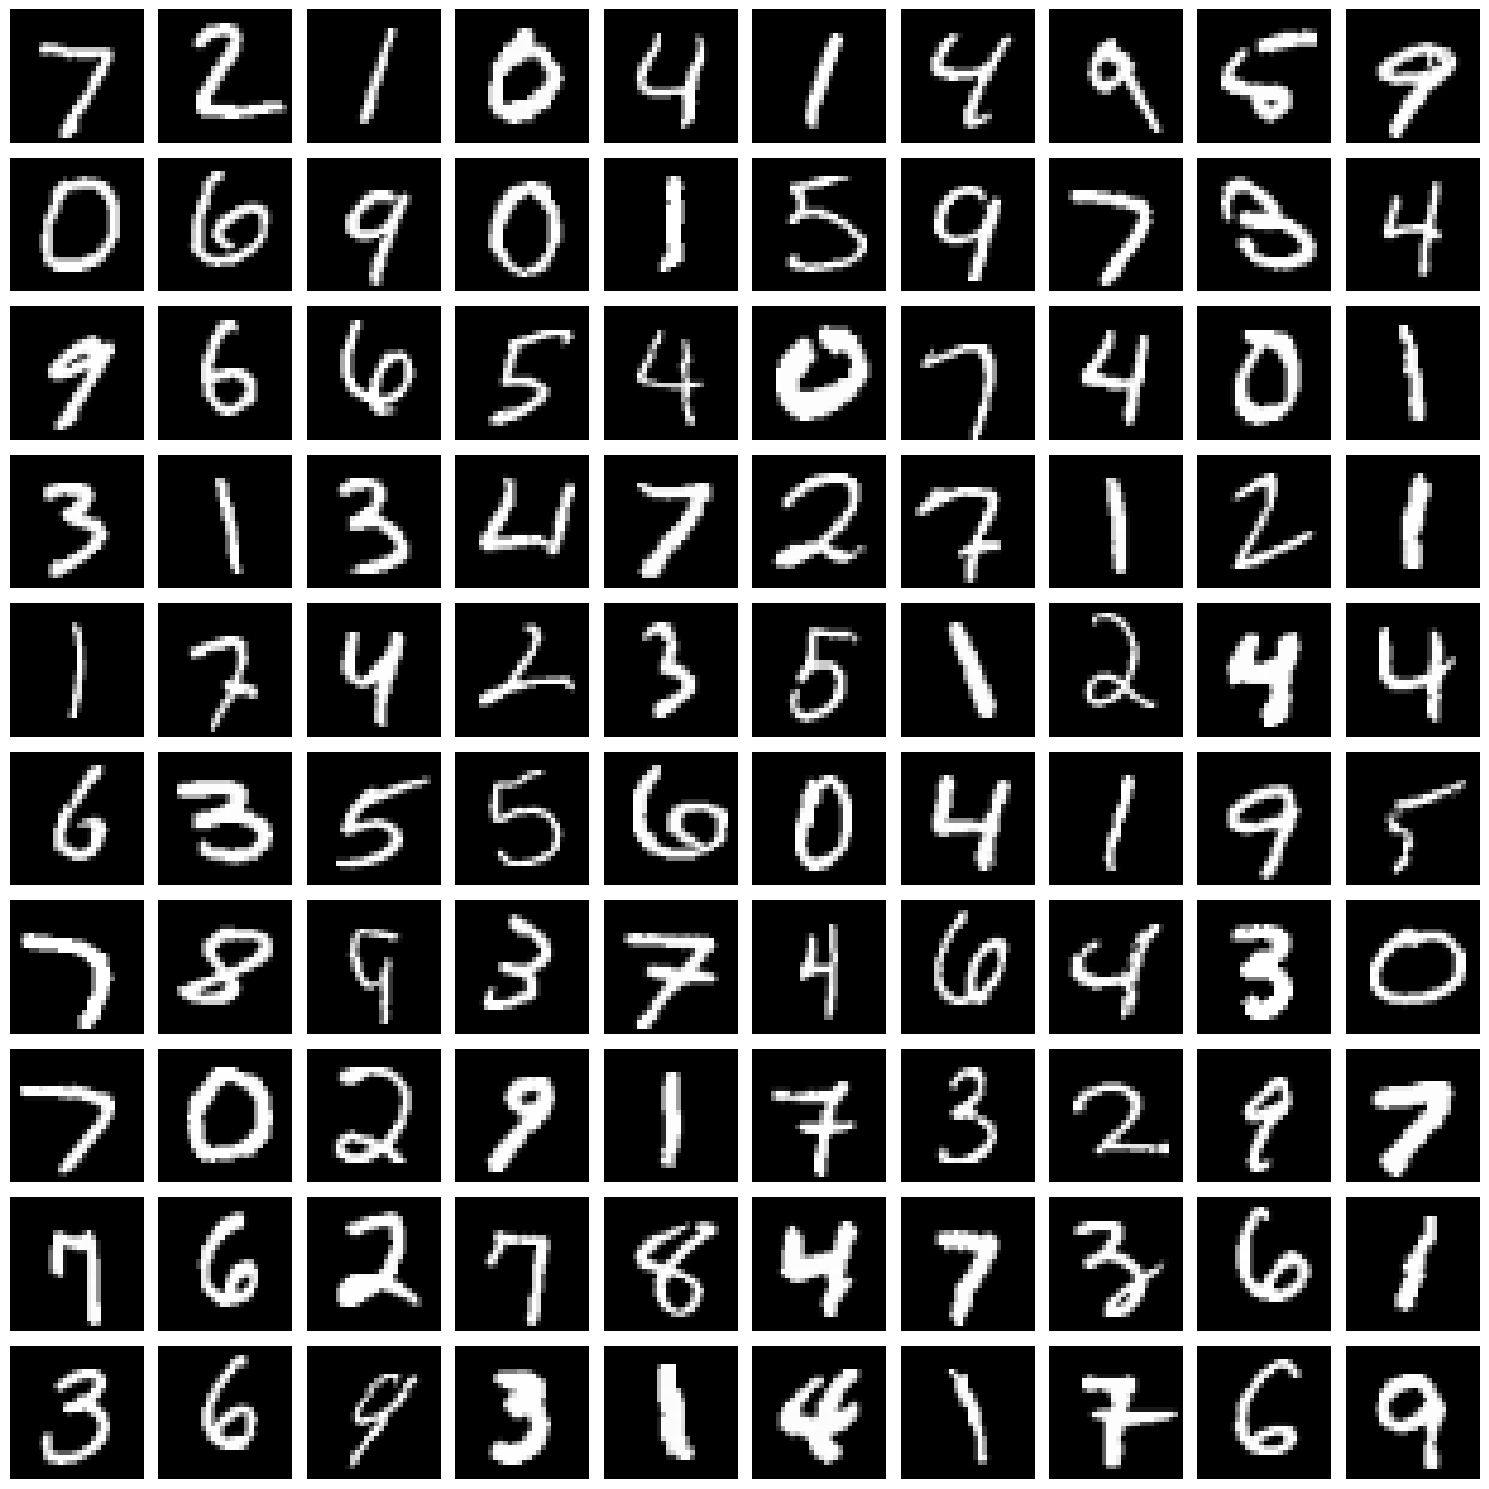

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Example data: creating 100 random images of size 10x10
images = X_test[:100]

# Number of rows and columns for the grid
rows = 10
cols = 10

fig, axes = plt.subplots(rows, cols, figsize=(15, 15))

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i].reshape(28,28), cmap='gray')
    ax.axis('off')  # Hide the axis

plt.tight_layout()
plt.show()


In [44]:
sgd_clf.fit(X_train,Y_train)



ValueError: Expected 2D array, got 1D array instead:
array=[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 127. 221.
  52.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  64. 229. 219.
 104.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  13. 235. 140.   4.
   3.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 118. 227.  25.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 236. 133.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.  13. 243.  93.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.  85. 243.  21.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0. 189. 236.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   1. 208. 169.   0.   0.   0.
   0.   0.   0.  64. 151. 151. 135.  74.   1.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  26. 254.  89.   0.   0.   0.
   0.   6. 142. 254. 224. 211. 181. 241.  70.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  26. 254.  68.   0.   0.   0.
   2. 161. 254. 104.   7.   0.   0.  80. 223.  15.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  57. 254.  15.   0.   0.   0.
 150. 231.  68.   1.   0.   0.   0.   9. 231.  26.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  79. 254.  15.   0.   0.  24.
 228.  66.   0.   0.   0.   0.   0.   0. 196.  87.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  73. 254.  43.   0.   0. 116.
 251.   7.   0.   0.   0.   0.   0.   0. 196. 100.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  13. 230. 147.   0.   0.  60.
 255.  70.   0.   0.   0.   0.   0.   4. 209.  84.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0. 203. 232.   4.   0.  42.
 253.  74.   0.   0.   0.   0.   0. 114. 233.  17.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.  87. 252. 147.   0.   0.
 154. 229. 132. 123. 123.  63.  93. 248.  65.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 169. 249. 137.  23.
   8.  80. 100. 101. 107. 145. 192.  51.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   5. 139. 251. 224.
 144. 115. 115. 195. 254. 187.  48.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  55. 141.
 203. 244. 180. 129.  67.   2.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [84]:
preds = sgd_clf.predict(X_test)
precision_recall(confusion_matrix(Y_test,sgd_clf.predict(X_test)))
def summing(list_):
  sum = 0
  for i in list_:
    num = int(i)
    sum += num

  return sum

test = summing(Y_test)
test2 = summing(preds)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(Y_test, preds)
precision = precision_score(Y_test, preds,average='macro')
recall = recall_score(Y_test, preds,average='macro')
f1 = f1_score(Y_test, preds,average='macro')
print(test,test2)
print(accuracy,precision,recall,f1)

44434 46153
0.874 0.8866401587452636 0.8722016551120783 0.8749260091812581


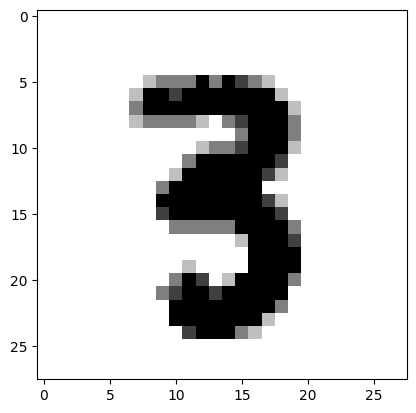

In [53]:
plt.imshow(X_test[1000].reshape(28,28),cmap="binary")
plt.show()

<div class="markdown-google-sans">

1.   List item
2.   List item


  <h2>What is Colab?</h2>
</div>

Colab, or "Colaboratory", allows you to write and execute Python in your browser, with
- Zero configuration required
- Access to GPUs free of charge
- Easy sharing

Whether you're a **student**, a **data scientist** or an **AI researcher**, Colab can make your work easier. Watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI) or [Colab Features You May Have Missed](https://www.youtube.com/watch?v=rNgswRZ2C1Y) to learn more, or just get started below!

<div class="markdown-google-sans">

## **Getting started**
</div>

The document you are reading is not a static web page, but an interactive environment called a **Colab notebook** that lets you write and execute code.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML**, **LaTeX** and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). To create a new Colab notebook you can use the File menu above, or use the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks that are hosted by Colab. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).

<div class="markdown-google-sans">

## Data science
</div>

With Colab you can harness the full power of popular Python libraries to analyze and visualize data. The code cell below uses **numpy** to generate some random data, and uses **matplotlib** to visualize it. To edit the code, just click the cell and start editing.

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from Github and many other sources. To learn more about importing data, and how Colab can be used for data science, see the links below under [Working with Data](#working-with-data).

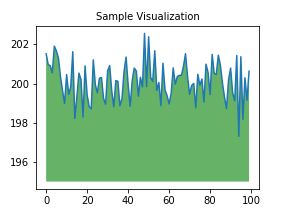

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

For example, if you find yourself waiting for **pandas** code to finish running and want to go faster, you can switch to a GPU Runtime and use libraries like [RAPIDS cuDF](https://rapids.ai/cudf-pandas) that provide zero-code-change acceleration.

To learn more about accelerating pandas on Colab, see the [10 minute guide](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_colab_demo.ipynb) or
 [US stock market data analysis demo](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_stocks_demo.ipynb).

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb).

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the [machine learning examples](#machine-learning-examples) below.

<div class="markdown-google-sans">

## More Resources

### Working with Notebooks in Colab

</div>

- [Overview of Colab](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with Data
</div>

- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine Learning Crash Course

<div>

These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Intro to RAPIDS cuDF to accelerate pandas](https://nvda.ws/rapids-cudf)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.
